In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [5]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [6]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.6963 - loss: 0.5512 - val_accuracy: 0.8654 - val_loss: 0.3227
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8998 - loss: 0.2533 - val_accuracy: 0.8856 - val_loss: 0.2760
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9314 - loss: 0.1855 - val_accuracy: 0.8869 - val_loss: 0.3104
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9450 - loss: 0.1510 - val_accuracy: 0.8896 - val_loss: 0.2798
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9608 - loss: 0.1126 - val_accuracy: 0.8834 - val_loss: 0.3020


In [7]:
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8750 - loss: 0.3291

 Test Accuracy : 0.8785


In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

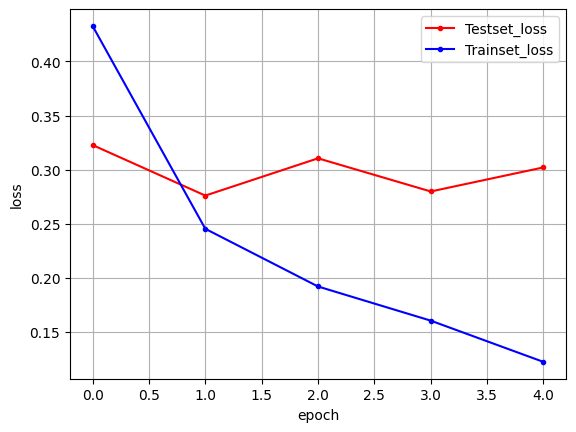

In [10]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

어텐션

In [11]:
!pip install attention

In [12]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)

In [15]:
from attention import Attention
model = Sequential()
model.add(Embedding(5000,500))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [17]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

In [20]:
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_data=(X_test,y_test), callbacks=[early_stopping_callback])

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(40,), output.shape=(40, 500, 1)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense, Activation, Input, Attention
from tensorflow.keras.models import Model

# 입력 레이어 정의
inputs = Input(shape=(None,))  # 시퀀스 길이는 None으로 설정

# 임베딩 레이어
embedding = Embedding(input_dim=5000, output_dim=500)(inputs)
dropout1 = Dropout(0.5)(embedding)

# LSTM 레이어
lstm_output = LSTM(64, return_sequences=True)(dropout1)

# Attention 레이어를 위한 쿼리와 값 정의
query = lstm_output
value = lstm_output

# Attention 레이어
attention_output = Attention()([query, value])

# Attention 후 Dropout
dropout2 = Dropout(0.5)(attention_output)

# Dense와 Activation 레이어
dense = Dense(1)(dropout2)
output = Activation('sigmoid')(dense)

# 모델 정의
model = Model(inputs=inputs, outputs=output)

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_4 (Embedding)   │ (None, None, 500)      │      2,500,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, None, 500)      │              0 │ embedding_4[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, None, 64)       │        144,640 │ dropout_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_1 (Attention)   │ (None, None, 64)       │              0 │ lstm_4[0][0],          │
│                           │                        │                │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, None, 64)       │              0 │ attention_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, None, 1)        │             65 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, None, 1)        │              0 │ dense_2[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,644,705 (10.09 MB)

 Trainable params: 2,644,705 (10.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [ ]:
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()